In [1]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-05-16 10:51:58.787752: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 10:51:58.789362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 10:51:58.817302: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 10:51:58.818264: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 10:51:59.350773: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# load the dataset
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
print(dataset.shape)
print(dataset[:5, :])

# split into input (X) and output (y) variables
def get_data():
    dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
    X = dataset[:,0:8]
    y = dataset[:,8]
    return X, y

(768, 9)
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]]


In [3]:
# define the keras model
def get_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

print(get_model())

In [4]:
def plot_training_stat(history=None):
    # list all data in history
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# plot_training_stat(history)

In [5]:
def train_model(model, X_train, y_train, X_test, y_test):
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    history = model.fit(X_train, y_train, epochs=150, batch_size=10)
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X_test, y_test)
    
    print('Accuracy: %.2f' % (accuracy*100))

# create model and call for training
model = get_model()
X, y = get_data()
train_model(model, X, y, X, y)

Epoch 1/150
77/77 [==============================] - 0s 598us/step - loss: 1.3525 - accuracy: 0.5404
Epoch 2/150
77/77 [==============================] - 0s 538us/step - loss: 0.7398 - accuracy: 0.6094
Epoch 3/150
77/77 [==============================] - 0s 521us/step - loss: 0.6950 - accuracy: 0.6315
Epoch 4/150
77/77 [==============================] - 0s 528us/step - loss: 0.6765 - accuracy: 0.6458
Epoch 5/150
77/77 [==============================] - 0s 521us/step - loss: 0.6650 - accuracy: 0.6471
Epoch 6/150
77/77 [==============================] - 0s 540us/step - loss: 0.6587 - accuracy: 0.6497
Epoch 7/150
77/77 [==============================] - 0s 610us/step - loss: 0.6569 - accuracy: 0.6510
Epoch 8/150
77/77 [==============================] - 0s 608us/step - loss: 0.6533 - accuracy: 0.6497
Epoch 9/150
77/77 [==============================] - 0s 576us/step - loss: 0.6491 - accuracy: 0.6484
Epoch 10/150
77/77 [==============================] - 0s 589us/step - loss: 0.6457 - accura

In [6]:
from sklearn.model_selection import train_test_split

# separate test data
# 
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"train: {X_train.shape}, test: {X_test.shape}")

# create model and call for training
model = get_model()
train_model(model, X_train, y_train, X_test, y_test)

train: (614, 8), test: (154, 8)
Epoch 1/150
62/62 [==============================] - 0s 595us/step - loss: 1.6757 - accuracy: 0.5765
Epoch 2/150
62/62 [==============================] - 0s 632us/step - loss: 1.2825 - accuracy: 0.6075
Epoch 3/150
62/62 [==============================] - 0s 608us/step - loss: 1.0950 - accuracy: 0.5993
Epoch 4/150
62/62 [==============================] - 0s 584us/step - loss: 1.0344 - accuracy: 0.6124
Epoch 5/150
62/62 [==============================] - 0s 566us/step - loss: 0.9261 - accuracy: 0.6173
Epoch 6/150
62/62 [==============================] - 0s 575us/step - loss: 0.9098 - accuracy: 0.6287
Epoch 7/150
62/62 [==============================] - 0s 588us/step - loss: 0.8730 - accuracy: 0.6124
Epoch 8/150
62/62 [==============================] - 0s 572us/step - loss: 0.8349 - accuracy: 0.6254
Epoch 9/150
62/62 [==============================] - 0s 585us/step - loss: 0.8234 - accuracy: 0.6368
Epoch 10/150
62/62 [==============================] - 0s 58

Epoch 1/150
62/62 [==============================] - 0s 2ms/step - loss: 18.2685 - accuracy: 0.6287 - val_loss: 2.4574 - val_accuracy: 0.5260
Epoch 2/150
62/62 [==============================] - 0s 894us/step - loss: 2.0527 - accuracy: 0.4805 - val_loss: 1.3879 - val_accuracy: 0.4610
Epoch 3/150
62/62 [==============================] - 0s 883us/step - loss: 1.2535 - accuracy: 0.5619 - val_loss: 0.8681 - val_accuracy: 0.5974
Epoch 4/150
62/62 [==============================] - 0s 915us/step - loss: 1.0444 - accuracy: 0.5651 - val_loss: 0.8555 - val_accuracy: 0.6104
Epoch 5/150
62/62 [==============================] - 0s 881us/step - loss: 0.9954 - accuracy: 0.5717 - val_loss: 0.8375 - val_accuracy: 0.6234
Epoch 6/150
62/62 [==============================] - 0s 877us/step - loss: 0.8890 - accuracy: 0.6059 - val_loss: 0.7558 - val_accuracy: 0.5974
Epoch 7/150
62/62 [==============================] - 0s 880us/step - loss: 0.8560 - accuracy: 0.6189 - val_loss: 0.7420 - val_accuracy: 0.6299


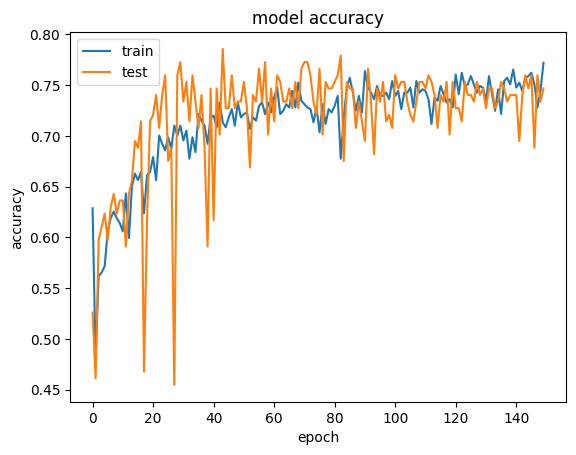

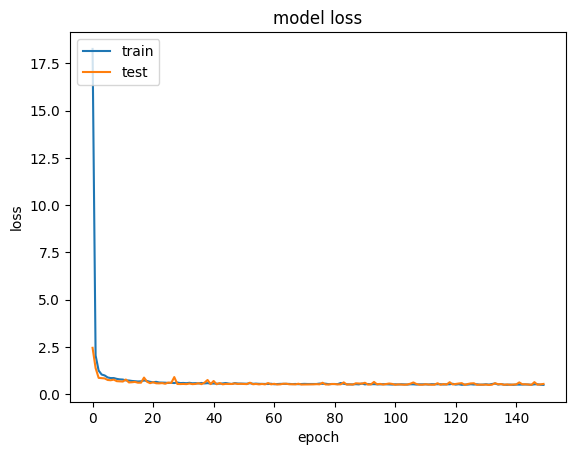

5/5 [==============================] - 0s 1ms/step - loss: 0.5465 - accuracy: 0.7468
Accuracy: 74.68


In [13]:
def train_model_with_validation(model, X_train, y_train, X_test, y_test):
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10)
    plot_training_stat(history)
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X_test, y_test)
    
    print('Accuracy: %.2f' % (accuracy*100))

# create model and call for training
model = get_model()
train_model_with_validation(model, X_train, y_train, X_test, y_test)

In [8]:
# make prediction for test data
# 
predictions = (model.predict(X_test) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
 print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

5/5 [==============================] - 0s 752us/step
[1.0, 199.0, 76.0, 43.0, 0.0, 42.9, 1.394, 22.0] => 1 (expected 1)
[2.0, 107.0, 74.0, 30.0, 100.0, 33.6, 0.404, 23.0] => 0 (expected 0)
[4.0, 76.0, 62.0, 0.0, 0.0, 34.0, 0.391, 25.0] => 0 (expected 0)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 1 (expected 1)
[0.0, 111.0, 65.0, 0.0, 0.0, 24.6, 0.66, 31.0] => 0 (expected 0)


In [9]:
# Analyse model
# 
net = get_model()
print(f'{len(net.layers)} " layers"')
for layer in net.layers:
    print(type(layer))

# Each layer has 2 items - weights and biases
print(f'layer items: {len(net.layers[0].get_weights())}')

print("weights", net.layers[0].get_weights()[0].shape)
print(net.layers[0].get_weights()[0])

print("biases", net.layers[0].get_weights()[1].shape)
print(net.layers[0].get_weights()[1])


3 " layers"
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
<class 'keras.layers.core.dense.Dense'>
layer items: 2
weights (8, 12)
[[-0.31361648  0.26748365 -0.38391876  0.3446883   0.24984735  0.5273559
  -0.30534783  0.38171184 -0.28720823  0.26214772 -0.15876874 -0.2196002 ]
 [ 0.49657214  0.46316028  0.27025485  0.26694828  0.32209945  0.39227688
   0.1478647  -0.42878672 -0.40706956 -0.53156465 -0.26405627 -0.38483694]
 [-0.42877877  0.29626483  0.49752212 -0.3670609  -0.17585492 -0.39557487
  -0.5259513  -0.3576936   0.4735105   0.3139556   0.38725513 -0.47026005]
 [ 0.11132079 -0.5416708   0.20844388  0.42566764 -0.05858403  0.42576635
   0.00605845 -0.3612944  -0.14510658 -0.23533791 -0.53308594 -0.03241765]
 [-0.43772805 -0.5285777  -0.1325809   0.17560261 -0.4164462  -0.12844625
   0.12269312 -0.11843348 -0.13897368  0.41521007 -0.07979664  0.08826458]
 [ 0.27498955  0.3634618  -0.4827062   0.15834332 -0.40460926  0.35616547
   0.3836798   0.50

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [11]:
# create model and call for training
train_model(net, X_train, y_train, X_test, y_test)

print("weights", net.layers[0].get_weights()[0].shape)
print(net.layers[0].get_weights()[0])

print("biases", net.layers[0].get_weights()[1].shape)
print(net.layers[0].get_weights()[1])

Epoch 1/150
62/62 [==============================] - 0s 553us/step - loss: 10.4344 - accuracy: 0.3648
Epoch 2/150
62/62 [==============================] - 0s 543us/step - loss: 2.1135 - accuracy: 0.4332
Epoch 3/150
62/62 [==============================] - 0s 512us/step - loss: 0.8748 - accuracy: 0.5782
Epoch 4/150
62/62 [==============================] - 0s 509us/step - loss: 0.7477 - accuracy: 0.6156
Epoch 5/150
62/62 [==============================] - 0s 524us/step - loss: 0.7122 - accuracy: 0.6368
Epoch 6/150
62/62 [==============================] - 0s 518us/step - loss: 0.6936 - accuracy: 0.6482
Epoch 7/150
62/62 [==============================] - 0s 534us/step - loss: 0.6832 - accuracy: 0.6596
Epoch 8/150
62/62 [==============================] - 0s 515us/step - loss: 0.6778 - accuracy: 0.6629
Epoch 9/150
62/62 [==============================] - 0s 520us/step - loss: 0.6727 - accuracy: 0.6678
Epoch 10/150
62/62 [==============================] - 0s 537us/step - loss: 0.6687 - accur

In [12]:

print(f'{len(net.layers)} " layers"')
for layer in net.layers:
    print(f'{type(layer)}, weights:{layer.get_weights()[0].shape}, biases:{layer.get_weights()[1].shape}')

3 " layers"
<class 'keras.layers.core.dense.Dense'>, weights:(8, 12), biases:(12,)
<class 'keras.layers.core.dense.Dense'>, weights:(12, 8), biases:(8,)
<class 'keras.layers.core.dense.Dense'>, weights:(8, 1), biases:(1,)
